# Settings
### Import modules

In [1]:
import os
import librosa, librosa.display
import matplotlib.pyplot as plt
import soundfile as sf
import numpy as np

### Initialize & Checking Path 

In [2]:
audio_path = './audio'
percussive_path = './audio/percussive'
trim_path = './audio/trim'
mel_path = './audio/mel'
audio_list = os.listdir(audio_path)
percussive_list = os.listdir(percussive_path)
trim_list = os.listdir(trim_path)
mel_list = os.listdir(mel_path)
print(audio_list)
print(percussive_list)
print(trim_list)
print(mel_list)


['mel', 'only_drum.wav', 'percussive', 'trim']
[]
[]
[]


## Defining three methods 
### 1. Extract only percussive sound(drum) from audio samples

In [3]:
# audio_data --> percussive_data 
def percussive_audio_data(audio_file, save_file):
    # loading .wav file 
    y, sr = librosa.load(audio_file)
    
    # harmonic percussive source seperation
    harmonic, percussive = librosa.decompose.hpss(librosa.stft(y))
    # saving only percussive source
    y = librosa.istft(percussive)
    y = ((y-min(y))/(max(y)-min(y)))*1.4-0.7
    
    # showing the waveform of the percussive source only
    plt.figure()
    librosa.display.waveshow(y, alpha=0.5)
    plt.xlabel("Time (s)")
    plt.ylabel("Aplitude")
    plt.title(f"{save_file}")
    
    # saving new file (only percussive sound)
    sf.write(save_file + '.wav', y, sr)
    print(f"'{save_file}' extracted from '{audio_file}'", end="\n\n")
    
    #plt.savefig(fname='G:/2021/KIST/1.code/Python/'+n_folder+'/Snare/Snare_'+ \
    #                music_n  + '_' + str(num_staff) + '_' +  str(i) + '.jpg', bbox_inches='tight', pad_inches=0)

['mel', 'only_drum.wav', 'percussive', 'trim']
'./audio/percussive/only_drum_p' extracted from './audio/only_drum.wav'



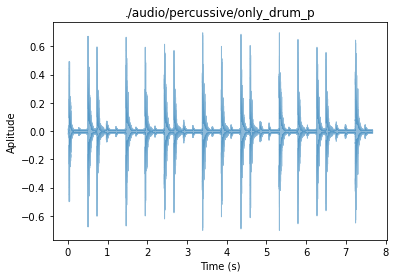

In [4]:
# showing audio samples
audio_list = os.listdir(audio_path)
print(audio_list)

# extracting only percussive sound from .wav file 
for audio_name in audio_list:
    if audio_name.find('wav') != -1:
        audio_file = audio_path + '/' + audio_name
        percussive_file = percussive_path + '/' + audio_name[:-4] + '_p'
        percussive_audio_data(audio_file, percussive_file)

### 2. Trim percussive sound one by one

In [5]:
# percussive_data --> trim_data 
def trim_percussive_data(percussive_file, save_file):
    # loading .wav file 
    y, sr = librosa.load(percussive_file)
    # setting prefix and suffix (To make a sample with a fixed size)
    append_front = np.array([0 for _ in range(92)])
    append_back = np.array([0 for _ in range(900)])
    
    # onset detection
    onset_time = librosa.onset.onset_detect(y=y, sr=sr, units='time')
    f = open("onset_time.txt", 'w')
    print(f"{len(onset_time)} event(s) has been detected.")
    
    # Trim, using Onset Detection Time
    plt.figure(figsize=[20,55])
    for i in range(len(onset_time)):
        ny = y[int(sr*(onset_time[i]-0.03)):int(sr*(onset_time[i]+0.11))]
        ny = np.concatenate((append_front, ny, append_back), axis=0)
        
        # showing the waveform of each sounds
        plt.subplot(58,1,i+1)
        plt.plot(ny)
        plt.ylim(-0.7,0.7)
        
        # saving files (trimmed samples)
        trim_file = save_file + '_' + str(i + 1)
        sf.write(trim_file + '.wav', ny, sr)
        f.write(str(onset_time[i]) +'\n')
        print(f"{onset_time[i]} \t(sec): '{trim_file}' created.") 
    
    f.close()
    print(f"\nAll files are {len(ny)/sr} sec long.")


['only_drum_p.wav']
Start Trim 'only_drum_p.wav'
32 event(s) has been detected.
0.06965986394557823 	(sec): './audio/trim/only_drum_p_1' created.
0.2786394557823129 	(sec): './audio/trim/only_drum_p_2' created.
0.5108390022675737 	(sec): './audio/trim/only_drum_p_3' created.
0.7430385487528345 	(sec): './audio/trim/only_drum_p_4' created.
0.9752380952380952 	(sec): './audio/trim/only_drum_p_5' created.
1.230657596371882 	(sec): './audio/trim/only_drum_p_6' created.
1.4628571428571429 	(sec): './audio/trim/only_drum_p_7' created.
1.7182766439909296 	(sec): './audio/trim/only_drum_p_8' created.
1.9504761904761905 	(sec): './audio/trim/only_drum_p_9' created.
2.2058956916099772 	(sec): './audio/trim/only_drum_p_10' created.
2.4380952380952383 	(sec): './audio/trim/only_drum_p_11' created.
2.670294784580499 	(sec): './audio/trim/only_drum_p_12' created.
2.9257142857142857 	(sec): './audio/trim/only_drum_p_13' created.
3.1579138321995464 	(sec): './audio/trim/only_drum_p_14' created.
3.3901

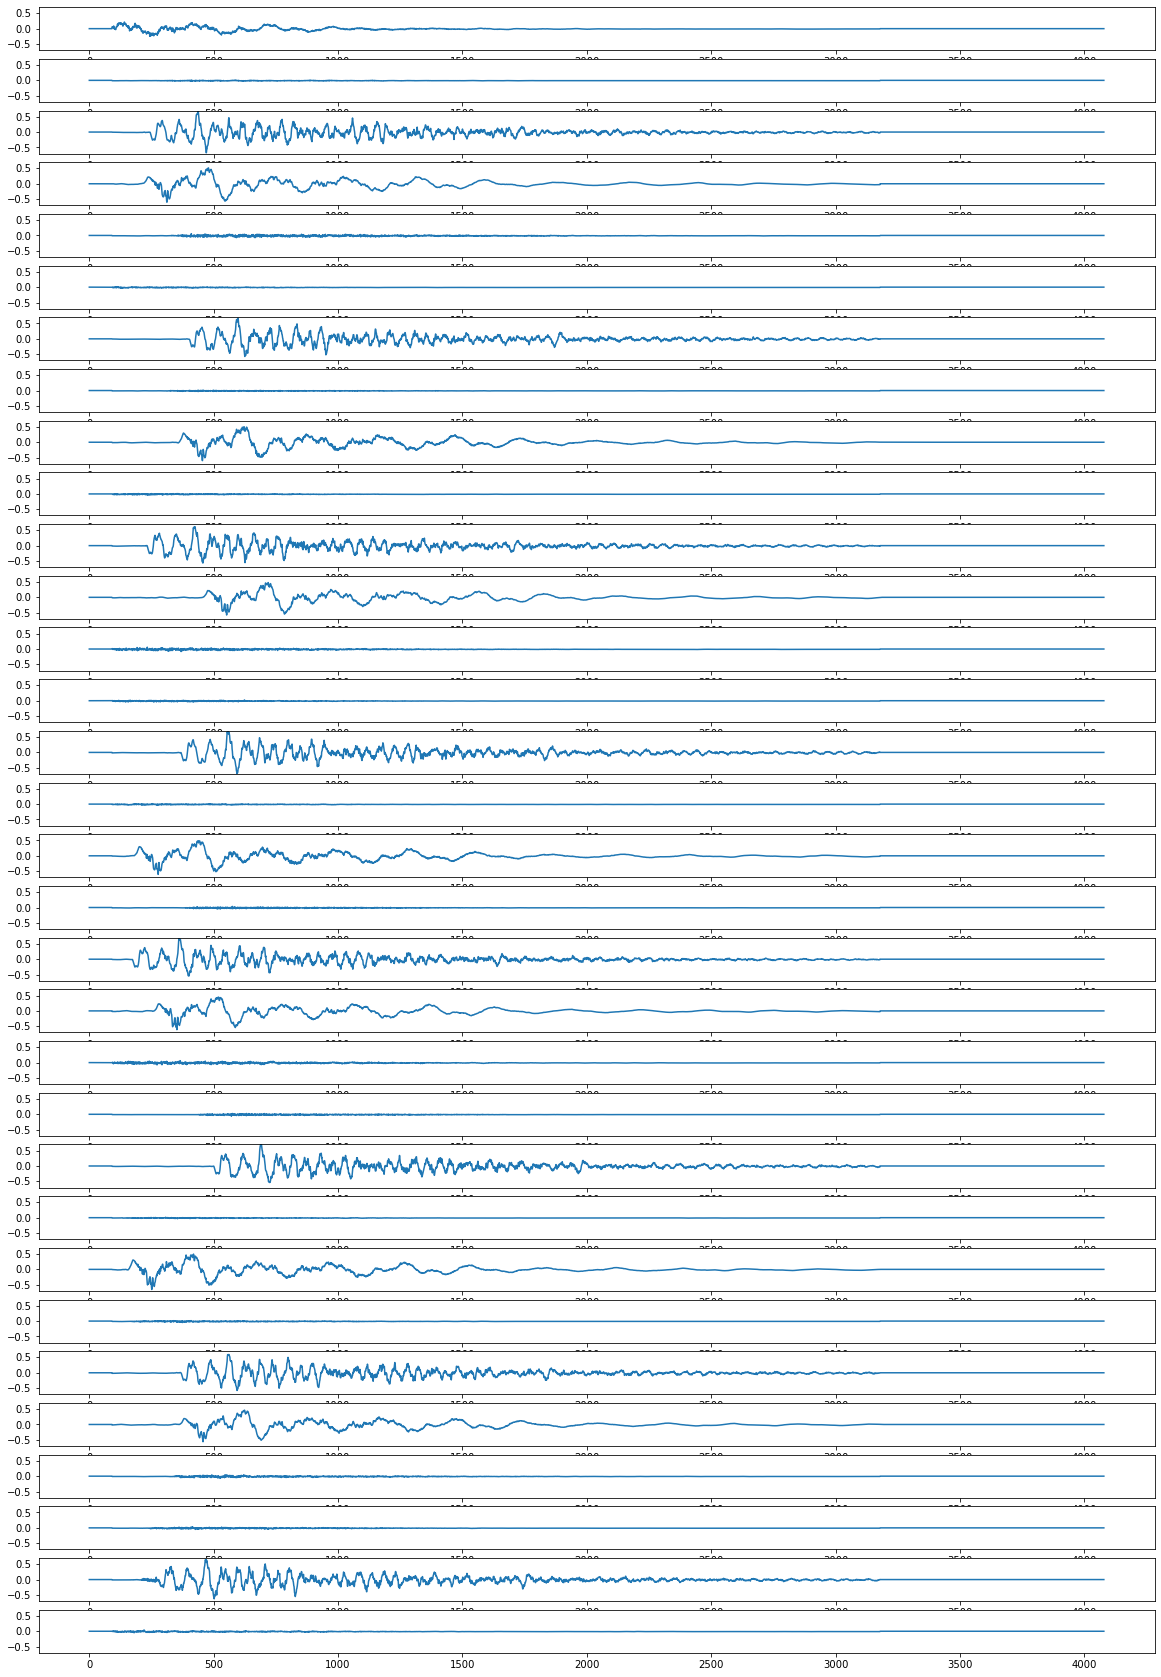

In [6]:
percussive_list = os.listdir(percussive_path)
print(percussive_list)

for percussive_name in percussive_list:
    if percussive_name.find('wav') != -1:
        print(f"Start Trim '{percussive_name}'")
        percussive_file = percussive_path + '/' + percussive_name
        trim_file = trim_path + '/' + percussive_name[:-4]
        
        trim_percussive_data(percussive_file, trim_file)

### 3. Make Trim data(.wav) into Mel-Spectrogram(.jpg)

In [7]:
trim_list = os.listdir(trim_path)
print(trim_list)

['only_drum_p_1.wav', 'only_drum_p_10.wav', 'only_drum_p_11.wav', 'only_drum_p_12.wav', 'only_drum_p_13.wav', 'only_drum_p_14.wav', 'only_drum_p_15.wav', 'only_drum_p_16.wav', 'only_drum_p_17.wav', 'only_drum_p_18.wav', 'only_drum_p_19.wav', 'only_drum_p_2.wav', 'only_drum_p_20.wav', 'only_drum_p_21.wav', 'only_drum_p_22.wav', 'only_drum_p_23.wav', 'only_drum_p_24.wav', 'only_drum_p_25.wav', 'only_drum_p_26.wav', 'only_drum_p_27.wav', 'only_drum_p_28.wav', 'only_drum_p_29.wav', 'only_drum_p_3.wav', 'only_drum_p_30.wav', 'only_drum_p_31.wav', 'only_drum_p_32.wav', 'only_drum_p_4.wav', 'only_drum_p_5.wav', 'only_drum_p_6.wav', 'only_drum_p_7.wav', 'only_drum_p_8.wav', 'only_drum_p_9.wav']


In [8]:
def Mel_data(trim_list):
        for t in trim_list:
            sample, sr = librosa.load(trim_path + '/' + t)
            # warnings.filterwarnings(action='ignore')
            
            # mel
            plt.figure(figsize=(6.898,4.719))
            f_sample=librosa.feature.melspectrogram(y = sample)
            librosa.display.specshow(librosa.power_to_db(f_sample), cmap='jet', y_axis='mel')
            plt.clim(-70,20)
            plt.axis('off')
            plt.savefig(fname= mel_path + '/' + t + '_mel.jpg', bbox_inches='tight', pad_inches=0)
            plt.close()
                    
        print("Complete saving mel_spectrograms.")

In [9]:
Mel_data(trim_list)

Complete saving mel_spectrograms.


In [10]:
# mel_list = os.listdir(mel_path)
# print(len(mel_list))

32


### Checking the files saved well

In [11]:
audio_list = os.listdir(audio_path)
percussive_list = os.listdir(percussive_path)
trim_list = os.listdir(trim_path)
mel_list = os.listdir(mel_path)
print(f"### percussive data({len(percussive_list)}) ###")
for p in percussive_list:
    print(p)
print()
print(f"### trim data({len(trim_list)}) ###")
for t in trim_list:
    print(t)
print()
print(f"### mel data({len(mel_list)}) ###")
for m in mel_list:
    print(m)
print()

### percussive data(1) ###
only_drum_p.wav

### trim data(32) ###
only_drum_p_1.wav
only_drum_p_10.wav
only_drum_p_11.wav
only_drum_p_12.wav
only_drum_p_13.wav
only_drum_p_14.wav
only_drum_p_15.wav
only_drum_p_16.wav
only_drum_p_17.wav
only_drum_p_18.wav
only_drum_p_19.wav
only_drum_p_2.wav
only_drum_p_20.wav
only_drum_p_21.wav
only_drum_p_22.wav
only_drum_p_23.wav
only_drum_p_24.wav
only_drum_p_25.wav
only_drum_p_26.wav
only_drum_p_27.wav
only_drum_p_28.wav
only_drum_p_29.wav
only_drum_p_3.wav
only_drum_p_30.wav
only_drum_p_31.wav
only_drum_p_32.wav
only_drum_p_4.wav
only_drum_p_5.wav
only_drum_p_6.wav
only_drum_p_7.wav
only_drum_p_8.wav
only_drum_p_9.wav

### mel data(32) ###
only_drum_p_1.wav_mel.jpg
only_drum_p_10.wav_mel.jpg
only_drum_p_11.wav_mel.jpg
only_drum_p_12.wav_mel.jpg
only_drum_p_13.wav_mel.jpg
only_drum_p_14.wav_mel.jpg
only_drum_p_15.wav_mel.jpg
only_drum_p_16.wav_mel.jpg
only_drum_p_17.wav_mel.jpg
only_drum_p_18.wav_mel.jpg
only_drum_p_19.wav_mel.jpg
only_drum_p_2.wav

# Test 
## EfficientNet-B0 & Trained model parameters

In [16]:
import torch, json
from torch.utils.data import DataLoader

# User define Modules
from drumdataset_load import DrumDataset_test
from models import EfficientNet

In [17]:
with open('./info.json', 'r') as f:
    info = json.load(f)
    
labels = info["labels"]

In [18]:
# mel_path = './audio/mel'
test_dataset = DrumDataset_test(labels, mel_path)
test_loader = DataLoader(test_dataset, batch_size = 1, shuffle = False, num_workers = 0)

# del input_dataset

In [19]:
save_path="./parameters/parameter/efficientnet_b0_result_mel_aug.pth"
net = EfficientNet.from_name('efficientnet-b0',in_channels=3, num_classes = 23)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.load_state_dict(torch.load(save_path))
net.eval()
net.to(device)

f = open('./onset_time.txt', 'r')
onset_time = f.readlines()
f. close()
onset_time = list(map(lambda s: s.strip(), onset_time))

with torch.no_grad():
    f = open('./drum_score.txt', 'w')
    i = 0
    for input_test,_ in test_loader:
        input_test = input_test.cuda()
        input_test = input_test.to("cuda").float()
        
        pred_test = net(input_test)
        # print(pred_test)
        __, predicted = torch.max(pred_test, 1)
        print(onset_time[i], 'sec\t: ', labels[predicted.item()])
        print(onset_time[i], 'sec\t: ', labels[predicted.item()], file=f)
        i+=1
f.close()

0.06965986394557823 sec	:  B+CH
0.2786394557823129 sec	:  CH
0.5108390022675737 sec	:  S
0.7430385487528345 sec	:  B+CH
0.9752380952380952 sec	:  CH
1.230657596371882 sec	:  CH
1.4628571428571429 sec	:  S
1.7182766439909296 sec	:  CH
1.9504761904761905 sec	:  B+CH
2.2058956916099772 sec	:  CH
2.4380952380952383 sec	:  S+CH
2.670294784580499 sec	:  B
2.9257142857142857 sec	:  CH
3.1579138321995464 sec	:  CH
3.3901133786848074 sec	:  S
3.645532879818594 sec	:  CH
3.877732426303855 sec	:  B+CH
4.1099319727891155 sec	:  CH
4.365351473922902 sec	:  S+CH
4.597551020408163 sec	:  B+CH
4.85297052154195 sec	:  CH
5.061950113378685 sec	:  CH
5.317369614512471 sec	:  S+CH
5.572789115646258 sec	:  CH
5.804988662131519 sec	:  B+CH
6.03718820861678 sec	:  CH
6.2693877551020405 sec	:  S+CH
6.501587301587302 sec	:  B+CH
6.757006802721088 sec	:  CH
6.989206349206349 sec	:  CH
7.244625850340136 sec	:  S+CH
7.500045351473923 sec	:  CH


In [20]:
# total_test = 0
# correct_test = 0
# correct_test_3 = 0
# pred = []
# corr = []

# save_path="E:parameter/efficientnet_b0_result_mel_aug.pth"

# net = EfficientNet.from_name('efficientnet-b0',in_channels=3, num_classes = 23)
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# net.load_state_dict(torch.load(save_path))
# net.eval()
# net.to(device)

# cnt = 0

# with torch.no_grad():
#     print("debug")
#     for input_test,label_test in test_loader:
#         # print(input_test)
#         print(label_test)
#         print("########################################")
#         input_test = input_test.cuda()
#         label_test = label_test.cuda()
#         input_test = input_test.to("cuda").float()
#         label_test = label_test.to("cuda").long()

#         pred_test = net(input_test)
#         _, predicted = torch.max(pred_test, 1)
#         _, predicted_3 = torch.topk(pred_test,3)
        
#         if sum(label_test == predicted) == 6:
#             print(label_test, predicted)
#             print(cnt)
#         cnt += 1
#         correct_test += torch.sum(predicted == label_test)
#         total_test += len(label_test)
        
#         if len(label_test) < 8:
#             for n,i in enumerate(label_test): # rest bach size
#                 correct_test_3 += torch.sum(predicted_3[n] == i)
#         else:
#             for i in range(8): # bach size
#                 correct_test_3 += torch.sum(predicted_3[i] == label_test[i])
                
#         corr.append(label_test.cpu().tolist())
#         pred.append(predicted.cpu().tolist())
    
# temp = 100*correct_test.cpu().tolist()/total_test
# temp_3 = 100*correct_test_3.cpu().tolist()/total_test